### Batch vs Stochastic Gradient Descent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris


In [4]:
data = load_iris()

In [5]:
features = data['feature_names']
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target = data['target_names']
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(data['data'], columns=features)
df['target'] = data['target']

In [8]:
df.shape

(150, 5)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=41)
xtrain.shape

(120, 4)

In [14]:
ytrain.value_counts()

target
0    41
2    40
1    39
Name: count, dtype: int64

In [15]:
xtest.shape

(30, 4)

In [16]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation = 'relu' , input_dim = 4))
model.add(Dense(3, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83 (332.00 Byte)
Trainable params: 83 (332.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### BATCH Gradient Descent because of the batch size is equal to the size of rows

In [18]:
import time
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
start = time.time()
history1 = model.fit(xtrain, ytrain,epochs=500, batch_size=150)
print("The time taken: ",time.time() - start)

Epoch 1/500
1/1 [==============================] - 1s 527ms/step - loss: 1.4393 - accuracy: 0.3417
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4128 - accuracy: 0.3417
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3870 - accuracy: 0.3417
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 1.3621 - accuracy: 0.3417
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 1.3381 - accuracy: 0.3417
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 1.3149 - accuracy: 0.3417
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2927 - accuracy: 0.3417
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 1.2714 - accuracy: 0.3417
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 1.2510 - accuracy: 0.3417
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2316 - accuracy: 0.3417
Epoch 11/500
1/1 [===

### Stochastic Gradient Descent beacuse here we use 1 in batch size where in each epochs for this data set the model will update the each data at one time so here the time will be grater than the batch gradient descent

In [19]:
import time
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
start = time.time()
history2 = model.fit(xtrain, ytrain,epochs=500, batch_size=1)
print(time.time() - start)

Epoch 1/500
120/120 [==============================] - 3s 11ms/step - loss: 0.3890 - accuracy: 0.8833
Epoch 2/500
120/120 [==============================] - 1s 12ms/step - loss: 0.3778 - accuracy: 0.9417
Epoch 3/500
120/120 [==============================] - 1s 11ms/step - loss: 0.3578 - accuracy: 0.9583
Epoch 4/500
120/120 [==============================] - 1s 12ms/step - loss: 0.3531 - accuracy: 0.9083
Epoch 5/500
120/120 [==============================] - 1s 9ms/step - loss: 0.3429 - accuracy: 0.9833
Epoch 6/500
120/120 [==============================] - 1s 11ms/step - loss: 0.3313 - accuracy: 0.9583
Epoch 7/500
120/120 [==============================] - 1s 9ms/step - loss: 0.3238 - accuracy: 0.9750
Epoch 8/500
120/120 [==============================] - 1s 8ms/step - loss: 0.3111 - accuracy: 0.9750
Epoch 9/500
120/120 [==============================] - 1s 8ms/step - loss: 0.3080 - accuracy: 0.9500
Epoch 10/500
120/120 [==============================] - 1s 8ms/step - loss: 0.2999 - a

In [22]:
type(history2)

keras.src.callbacks.History

#### Smoothness in Batch Gradient Descent

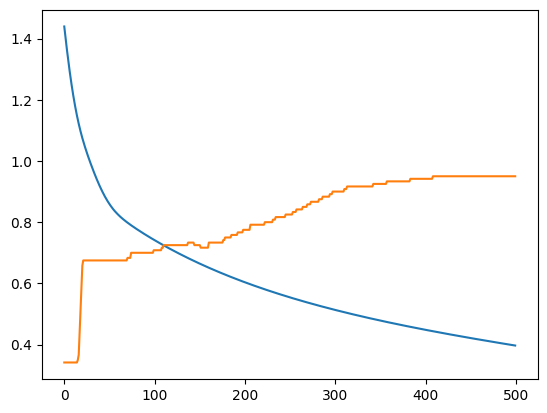

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['accuracy'])

### Here Smoothness is not as in Batch Gradint Descent

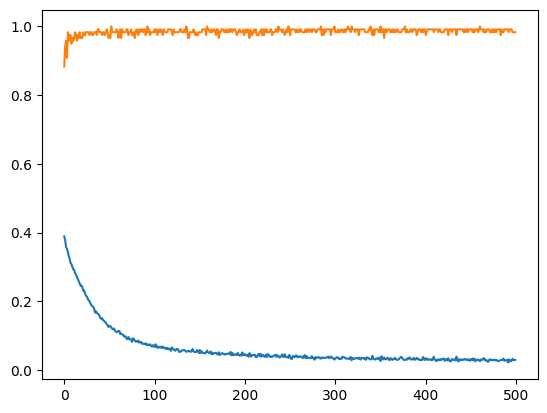

In [21]:
plt.plot(history2.history["loss"])
plt.plot(history2.history['accuracy'])